# Clustering - march 16th

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from IPython.core.display import HTML
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.set()

In [2]:
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

### Read data

In [3]:
df = pd.read_csv('dev.csv')
df = df.iloc[:, 4:]
df = df.drop_duplicates()
df = df.dropna()
df

,Column,EndLine,EndColumn,CC,CCL,CCO,CI,CLC,CLLC,LDC,...,Naming.Rules,Optimization.Rules,Security.Code.Guideline.Rules,Size.Metric.Rules,Strict.Exception.Rules,String.and.StringBuffer.Rules,Type.Resolution.Rules,Unnecessary.and.Unused.Code.Rules,Vulnerability.Rules,bugs
0,1,223,2,0.082397,1,3,1,0.055556,0.064935,10,...,0,0,0,3,0,0,0,0,0,False
1,1,43,2,0.000000,0,0,0,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,0,False
2,1,67,2,0.000000,0,0,0,0.000000,0.000000,0,...,0,0,0,1,0,0,0,0,0,False
3,1,59,2,0.543860,1,4,2,0.468085,0.523810,22,...,2,0,0,0,0,0,0,0,0,False
4,1,34,2,0.000000,0,0,0,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71798,1,168,2,0.000000,0,0,0,0.000000,0.000000,0,...,0,0,0,8,0,0,0,0,0,False
71802,1,86,2,0.441441,1,1,1,0.185185,0.227273,10,...,0,0,0,3,0,0,0,0,0,False
71803,1,85,2,0.000000,0,0,0,0.000000,0.000000,0,...,1,2,0,1,0,0,0,0,0,False
71804,87,313,18,0.000000,0,0,0,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,0,False


### Elbow method

-> used to find the best number of clusters

In [4]:
df_cluster = df.copy()
df_cluster = df_cluster.iloc[:,:-1]

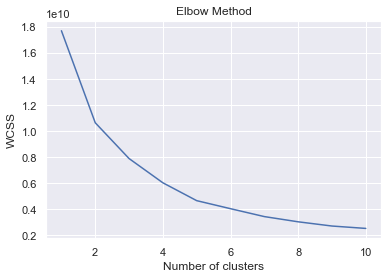

In [5]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_cluster)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
df_copy = df.copy()
targets = [0 if (i == False) else 1 for i in df_copy.iloc[:,-1]]

In [7]:
y = pd.DataFrame(targets)
y.columns = ["Targets"]

#Normalize data
X = scale(df_copy.iloc[:,:-1])
X

array([[-0.53229363, -0.12343058, -0.4879504 , ..., -0.21224542,
        -0.08149815, -0.00883694],
       [-0.53229363, -0.51654881, -0.4879504 , ..., -0.21224542,
        -0.08149815, -0.00883694],
       [-0.53229363, -0.46413305, -0.4879504 , ..., -0.21224542,
        -0.08149815, -0.00883694],
       ...,
       [-0.53229363, -0.42482122, -0.4879504 , ..., -0.21224542,
        -0.08149815, -0.00883694],
       [ 1.91581605,  0.07312854,  1.82942098, ..., -0.21224542,
        -0.08149815, -0.00883694],
       [ 2.59900945, -0.33090965,  0.67073529, ..., -0.21224542,
        -0.08149815, -0.00883694]])

### KMeans

In [8]:
# 2 clusters - True or False for bugs
clustering = KMeans(n_clusters=2, random_state=300).fit(X)
clustering

KMeans(n_clusters=2, random_state=300)

In [9]:
y

,Targets
0,0
1,0
2,0
3,0
4,0
...,...
51221,0
51222,0
51223,0
51224,0


In [10]:
precision_score(y, clustering.labels_, average=None)

array([0.78130217, 0.05521196])

In [11]:
print(classification_report(y, clustering.labels_))

              precision    recall  f1-score   support

           0       0.78      0.04      0.07     48006
           1       0.06      0.84      0.10      3220

    accuracy                           0.09     51226
   macro avg       0.42      0.44      0.09     51226
weighted avg       0.74      0.09      0.08     51226



### DBSCAN

In [12]:
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
dbscan.fit(X)

DBSCAN(eps=0.3)

In [13]:
precision_score(y, dbscan.labels_, average=None)

array([0.        , 0.97810734, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
print(classification_report(y, dbscan.labels_))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.98      0.03      0.06     48006
           1       0.00      0.00      0.00      3220
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00    

/Users/pedromtelho/Documents/intercambio/ades/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pedromtelho/Documents/intercambio/ades/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pedromtelho/Documents/intercambio/ades/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

### Data visualization

In [ ]:
cores = np.array(['lightsalmon', 'powderblue'])
relabel = np.choose(clustering.labels_, [1, 0]).astype(np.int64)
feat = df_copy.columns
for i in range(0, len(feat)):
    for j in range(1, len(feat)):
        print(feat[i], feat[j])
        plt.subplot(1,2,1)
        plt.scatter(x=df_copy[feat[i]],
                    y=df_copy[feat[j]],
                    c=cores[y.Targets],
                    s=50)
        plt.title('Classificação Original')
        
        plt.subplot(1,2,2)
        plt.scatter(x=df_copy[feat[i]],
                    y=df_copy[feat[j]],
                    c=cores[relabel],
                    s=50)
        plt.legend()
        plt.title('K-Means')
        plt.show()